In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("atp_transformed/2000-2024_with_covid.csv")

df.head()


/var/folders/4p/pzg9jhn971xg0jxhjm2h4pd40000gn/T/ipykernel_48842/3734480100.py:6: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("atp_transformed/2000-2024 with covid.csv")


,tourney_id,tourney_name,tourney_type,surface,draw_size,tourney_level,tourney_date,match_num,score,round_1,...,double_faults,points_on_serve,first_serve_in,1st_won,2nd_won,service_games,break_points_saved,break_points_faced,match_outcome,player_tourney_match_id
0,2000-301,Auckland,matches,Hard,32,A,2000-01-10,1,7-5 4-6 7-5,7-5,...,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,1,103163:2000-301:1
1,2000-301,Auckland,matches,Hard,32,A,2000-01-10,1,7-5 4-6 7-5,7-5,...,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,0,101543:2000-301:1
2,2000-301,Auckland,matches,Hard,32,A,2000-01-10,2,7-5 7-5,7-5,...,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,1,102607:2000-301:2
3,2000-301,Auckland,matches,Hard,32,A,2000-01-10,2,7-5 7-5,7-5,...,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,0,102644:2000-301:2
4,2000-301,Auckland,matches,Hard,32,A,2000-01-10,3,6-3 6-1,6-3,...,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,1,103252:2000-301:3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289980 entries, 0 to 1289979
Data columns (total 37 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tourney_id               1289980 non-null  object 
 1   tourney_name             1289980 non-null  object 
 2   tourney_type             1289980 non-null  object 
 3   surface                  1289874 non-null  object 
 4   draw_size                1289980 non-null  int64  
 5   tourney_level            1289980 non-null  object 
 6   tourney_date             1289980 non-null  object 
 7   match_num                1289980 non-null  int64  
 8   score                    1289880 non-null  object 
 9   round_1                  1289810 non-null  object 
 10  round_2                  1284520 non-null  object 
 11  round_3                  433102 non-null   object 
 12  round_4                  25000 non-null    object 
 13  round_5                  6832 non-null    

In [10]:
df.isnull().sum()

tourney_id                       0
tourney_name                     0
tourney_type                     0
surface                        106
draw_size                        0
tourney_level                    0
tourney_date                     0
match_num                        0
score                          100
round_1                        170
round_2                       5460
round_3                     856878
round_4                    1264980
round_5                    1283148
best_of                          0
tourney_round                    0
minutes                     932434
player_id                        0
player_seed                 848643
player_name                      0
player_hand                     15
player_height               461641
player_country                   9
player_age                    4637
player_rank                 106382
player_rank_points          106539
ace                         920970
double_faults               920970
points_on_serve     



We are dropping the rounds and scores because we are "predicting a players future best ranking aka peak ATP rank"
So we need input features, because it describes their ability, form and performance up to now.

#round_1 -> round_5 Many matches are best of 3, which means round_4 - round_5 are empty. Some tournaments report detailed set scores and some don't.
#score gives the full score string, it's text and not structured. Parsing it into usable numbers will take a LOT of cleaning.

Why they don’t add much value to our use case
1. They describe only a single match outcome

We already have match_outcome win/loss and can aggregate win rates per surface, tournament, etc.
The actual set by set scores don’t help predict future peak rank as much as long-term performance trends.

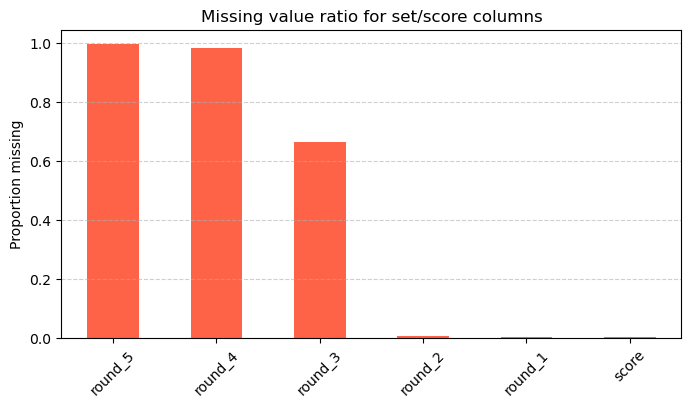

round_5    0.994704
round_4    0.980620
round_3    0.664257
round_2    0.004233
round_1    0.000132
score      0.000078
dtype: float64

In [24]:
import matplotlib.pyplot as plt

cols = ['score','round_1','round_2','round_3','round_4','round_5']
missing = df[cols].isna().mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
missing.plot(kind='bar', color='tomato')
plt.title('Missing value ratio for set/score columns')
plt.ylabel('Proportion missing')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

missing


In [27]:

drop_cols = ['round_1','round_2','round_3','round_4','round_5','score', 'tourney_id', 'tourney_name','tourney_date', 'player_tourney_match_id']
df_edit = df.drop(columns=drop_cols, errors='ignore')
df_edit['tourney_type'] = df['tourney_type'].replace({'matches': 1, 'futures': 2})
df_edit['player_hand'] = df['player_hand'].replace({'L': 1, 'R': 2})


df_edit.head()


,tourney_type,surface,draw_size,tourney_level,match_num,best_of,tourney_round,minutes,player_id,player_seed,...,ace,double_faults,points_on_serve,first_serve_in,1st_won,2nd_won,service_games,break_points_saved,break_points_faced,match_outcome
0,1,Hard,32,A,1,3,R32,108.0,103163,1.0,...,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,1
1,1,Hard,32,A,1,3,R32,108.0,101543,NaN,...,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,0
2,1,Hard,32,A,2,3,R32,85.0,102607,NaN,...,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,1
3,1,Hard,32,A,2,3,R32,85.0,102644,NaN,...,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,0
4,1,Hard,32,A,3,3,R32,56.0,103252,NaN,...,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,1


Everything that is unknown or zero, we fill in the most common hand.

In [ ]:
df_edit['player_hand'].value_counts(dropna=False)


player_hand
R      973260
U      168498
L      147640
A         567
NaN        15
Name: count, dtype: int64

In [ ]:
# Create missing flag first
df_edit['player_hand_missing'] = df['player_hand'].isna().astype(int)

# Fill missing values with 'U' (Unknown)
df_edit['player_hand'] = df['player_hand'].fillna('U')

# Replacing single letter codes with readable text
df_edit['player_hand'] = df['player_hand'].replace({
    'R': 'Right',
    'L': 'Left',
    'U': 'Unknown',
    'A': 'Ambidextrous'
})

# Quick check
print(df['player_hand'].value_counts())



player_hand
Right           973260
Unknown         168513
Left            147640
Ambidextrous       567
Name: count, dtype: int64


In [31]:
df_edit.head()

,tourney_type,surface,draw_size,tourney_level,match_num,best_of,tourney_round,minutes,player_id,player_seed,...,ace,double_faults,points_on_serve,first_serve_in,1st_won,2nd_won,service_games,break_points_saved,break_points_faced,match_outcome
0,1,Hard,32,A,1,3,R32,108.0,103163,1.0,...,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,1
1,1,Hard,32,A,1,3,R32,108.0,101543,NaN,...,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,0
2,1,Hard,32,A,2,3,R32,85.0,102607,NaN,...,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,1
3,1,Hard,32,A,2,3,R32,85.0,102644,NaN,...,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,0
4,1,Hard,32,A,3,3,R32,56.0,103252,NaN,...,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,1


For minutes, we put it into three buckets. And we made a new column called match_length that has those three buckets. 
The match_lenght that had empty fields we put into 'common'. And we deleted the minutes column

In [ ]:
#Count how many are missing (including blanks)
empty_minutes = df["minutes"].isna().sum() + (df["minutes"].astype(str).str.strip() == "").sum()
print(f"Empty or blank 'minutes': {empty_minutes}")

Empty or blank 'minutes': 932434


In [34]:
#Convert to numeric to ensure comparisons work
df["minutes"] = pd.to_numeric(df["minutes"], errors="coerce")

In [35]:
#Define the classifier function
def classify_match_length(x):
    if pd.isna(x):
        return np.nan
    elif x < 30:
        #short
        return 1  
    elif x <= 90:
        #medium
        return 2  
    else:
        #long
        return 3  

In [36]:
#Create match_length column
df["match_length"] = df["minutes"].apply(classify_match_length)

In [37]:
#Find the most common (mode) match length (AFTER creating the column)
most_common_length = df["match_length"].mode()[0]

In [38]:
#Fill NaN values with that mode
df["match_length"] = df["match_length"].fillna(most_common_length)

In [39]:
#Check the distribution of match lengths
print(df["match_length"].value_counts(dropna=False))
df.drop(columns=["minutes"], inplace=True)

match_length
3.0    1124622
2.0     163160
1.0       2198
Name: count, dtype: int64
